In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import warnings

In [2]:
Data = pd.read_csv('diabetes.csv')
Data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
x = pd.DataFrame(Data,columns=['Glucose','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','Age']).values
y = Data.Outcome.values.reshape(-1,1)
x

array([[148.   ,  72.   ,  35.   ,   0.   ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   ,   0.   ,   0.351,  31.   ],
       [183.   ,  64.   ,   0.   ,   0.   ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , 112.   ,   0.245,  30.   ],
       [126.   ,  60.   ,   0.   ,   0.   ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   ,   0.   ,   0.315,  23.   ]])

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.3,random_state =0)

In [5]:
k = 5
clf = KNeighborsClassifier(k)
clf.fit(x_train,y_train.ravel())
y_pred = clf.predict(x_test)

In [6]:
print('Accuracy :',metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.7142857142857143


In [7]:
k = 3
clf = KNeighborsClassifier(k)
clf.fit(x_train,y_train.ravel())
y_pred = clf.predict(x_test)

In [8]:
print('Accuracy :',metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.70995670995671


In [9]:
k = 10

clf = KNeighborsClassifier(k)
clf.fit(x_train,y_train.ravel())
y_pred = clf.predict(x_test)

In [10]:
print('Accuracy :',metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.7445887445887446


# Creating a For loop  to avoid  these  proces

In [11]:
k = 20 
Acc = np.zeros((k))

for i in range(1,k+1):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(x_train,y_train.ravel())
    y_pred = clf.predict(x_test)
    Acc[i-1] = metrics.accuracy_score(y_test,y_pred)

Acc    

array([0.62770563, 0.71428571, 0.70995671, 0.74025974, 0.71428571,
       0.72727273, 0.73160173, 0.74458874, 0.73593074, 0.74458874,
       0.74458874, 0.74025974, 0.73593074, 0.74458874, 0.73160173,
       0.73160173, 0.72727273, 0.73593074, 0.73593074, 0.73160173])

In [12]:
print(np.max(Acc))
print(np.min(Acc))

0.7445887445887446
0.6277056277056277


# Another way 

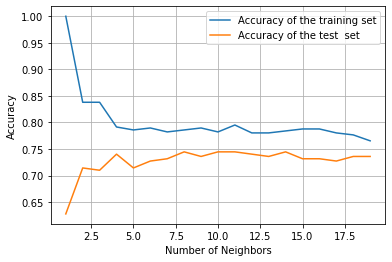

In [20]:
training_acc = []
test_acc = []


# try KNN for diffrent k nearest neighbor from 1 to 15

neighbors_setting = range(1,20)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train.ravel())
    training_acc.append(knn.score(x_train, y_train))
    test_acc.append(knn.score(x_test, y_test))
    
plt.plot(neighbors_setting,training_acc, label = 'Accuracy of the training set')
plt.plot(neighbors_setting,test_acc, label = 'Accuracy of the test  set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.grid()
plt.legend()

# Improve Model

In [17]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(1,50)}
grid_kn = GridSearchCV(estimator = knn,  #Model 
                        param_grid = parameters, # Range of K
                        scoring = 'accuracy',  #Strategy to evaluate the performance 
                        cv = 5, #cross-validation model on the test set.
                        verbose = 1, #Time to calculate 
                        n_jobs = -1) #Help to Cpu 
grid_kn.fit(x_train, y_train.ravel())

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=19), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy',
             verbose=1)

In [18]:
grid_kn.best_params_

{'n_neighbors': 8}